In [1]:
import il_pedagogical as ilp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from importance_learning.sampling import Distribution, ImportanceSample

plt.rcParams['figure.figsize'] = 9, 8
plt.rcParams.update({'font.size': 22})

0.0286757409207468


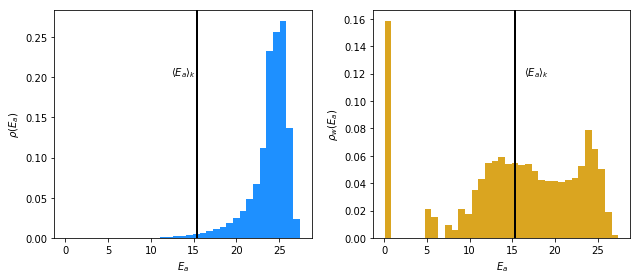

(198, 198)

In [19]:
lattice_size = 200
a = 30 # ~ Potential width, dimensionless
D = 25 # Potential depth, kJ/mol
r_eq = 1.0 # Equilibrium distance of unperturbed lattice, dimensionless
T = 300
sigma = ilp.morse_std(r_eq, D, a, T)
print(sigma)
delta = 1. * sigma

lower = 0.0
upper = 0.5 
# sigma = 0.1
mean = 0.0


lattice = ilp.make_quenched_disorder_lattice(lattice_size, delta, "uniform", False, lower, upper, delta, mean)
# plot_lattice(lattice)
NN_distances = ilp.nearest_neighbor_distances(lattice)
# Ads_E = ilp.adsorption_energies(lattice,r_eq, D, a, T, 1)
Ads_E = ilp.adsorption_energies(lattice, 2, 1, r_eq=1., D=30, a=a, std=delta, T=T)

barrier_distribution = Ads_E + 60

# K = ilp.compute_equilibrium_const(Ads_E, T)


# # ilp.histogram(Ads_E)
ilp.histogram(Ads_E.ravel(), T)
# plt.show()
# ilp.histogram(Ads_E, T, True)
barrier_distribution.shape


## Dialing in Parameters

The free parameters in the model are $a$, $D$, and $\delta$, all of which have a physical meaning.

$D$ has units of kJ/mol and controls how deep the potential well is. It is directly related to how strong the "bonds" to nearest neighbors are. D also sets the maximum value of $\Delta G_A(\textbf{r})$

$a$ is the well width and strongly influences the short range repulsive region of the curve. Because $\hat{r}$ and $\hat{r}_{eq}$ are non-dimensionalized, $a$ also sets the length scale of the lattice.

$\delta$ is the max displacement magnitude applied to the uniform sites. $\delta$ is also constrained to a max value of $0.5$. Values > 0.5 introduces the possibility of sites overlapping and the nearest neighbors of a site changing.

$D$ is set to ~30 kJ/mol, which is roughly half the value of $\Delta G^\ddagger$.

$a$ is set to 2.5. Plotting $w(r)$, and a length scale emerges. We can plot $p(w(r)) =\frac{\exp(-\beta w(r))}{ \int_{0}^{2} \exp(-\beta w(r))} dr $ to see the equilibrium population. The configurational partition function is over the range $[0, 2]$ because the maximum displacement applied to a site is $\hat{r} = 0.5$ to prevent sites overlapping and nearest neighbors shifting. In the uniform lattice, sites are initially a distance of $\hat{r} = 1$ apart. A distance of 0 occurs when two sites are displaced by $\hat{r} = 0.5$ *toward* each other, and a distance of 2 occurs when two sites are displaced by $\hat{r} = 0.5$ *away* from each other. The standard deviation of $p(w(r))$ can be computed through normal means, $\sigma = \sqrt{\langle r^2 \rangle - \langle r \rangle^2}$, and can be related to $\delta$.

Although $\delta=1.1\sigma$, $\rho(r) \in [0, 2.2\sigma]$



max[w(r)] = 2.855018474538677e+27


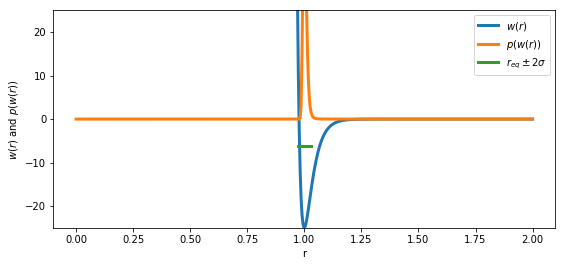

In [21]:
r = np.linspace(0,2,500)

w_r = ilp.morse_potential(r, r_eq, D, a)
p_r = ilp.morse_probability(r, r_eq, D, a, T)



plt.plot(r, w_r, linewidth=3, label=r'$w(r)$')
plt.plot(r, p_r, linewidth=3, label=r'$p(w(r))$')
plt.plot([r_eq - delta, r_eq + delta],[-0.25*D, -0.25*D], linewidth=3, label=r'$r_{eq} \pm %s \sigma$' % (2))
print('max[w(r)] = %s' % max(w_r))
plt.ylim(-D, 25)
plt.xlabel('r')
plt.ylabel(r'$w(r)$ and $p(w(r))$')
plt.legend()
plt.show()